by Stepan Perminov

In [ ]:
# !pip install pyrealsense2

In [1]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

## Read 435 BAG file

Next, we will open 435 and 265 streams from pre-recorded file and capture frames:

In [2]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file("data/435.bag")
cfg.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 30)
cfg.enable_stream(rs.stream.color, 848, 480, rs.format.bgr8, 30)
pipe = rs.pipeline()
profile = pipe.start(cfg)

# Skip first frames to give the Auto-Exposure time to adjust
for x in range(50):
  pipe.wait_for_frames()

# for _ in range(50):
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()
# print('current frame timestamp',depth_frame.get_timestamp())
# time.sleep(0.1)

# # TODO: Store frameset (as an image, point cloud, whatever) 
# # for later processing or process frames right here:
# while True:
#     frameset = pipe.wait_for_frames()
#     color_frame = frameset.get_color_frame()
#     depth_frame = frameset.get_depth_frame()
#     print('current frame timestamp',depth_frame.get_timestamp())
#     # save frames here with timestamp or process



# # Intrinsics & Extrinsics
# depth_intrin = depth_frame.profile.as_video_stream_profile().intrinsics
# color_intrin = color_frame.profile.as_video_stream_profile().intrinsics
# depth_to_color_extrin = depth_frame.profile.get_extrinsics_to(color_frame.profile)
# color_to_depth_extrin = color_frame.profile.get_extrinsics_to(depth_frame.profile)

# print ("\n Depth intrinsics: " + str(depth_intrin))
# # print("\n Color intrinsics: " + str(color_intrin))
# # print "\n Depth to color extrinsics: " + str(depth_to_color_extrin)

# # Depth scale - units of the values inside a depth frame, i.e how to convert the value to units of 1 meter
# depth_sensor = profile.get_device().first_depth_sensor()
# depth_scale = depth_sensor.get_depth_scale()
# print(depth_scale)


# Cleanup:
pipe.stop()
# print("Frames Captured")

Iteration over frames:

## RGB Data
Let's start with accessing the color componnent of the frameset:

(480, 848, 3)


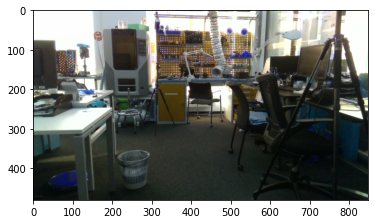

In [3]:
color = np.asanyarray(color_frame.get_data())

print(color.shape)
plt.plot(figsize=(10,10), dpi=300)
plt.imshow(color)
plt.show()

## Depth Data
Now, we will visualize the depth map captured by the RealSense camera:

(480, 848)


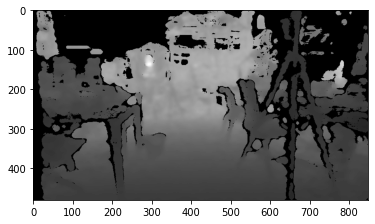

In [4]:
depth_image = np.asanyarray(depth_frame.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
print(depth_image.shape)
plt.imshow(depth_image, cmap='gray')

(480, 848, 3)


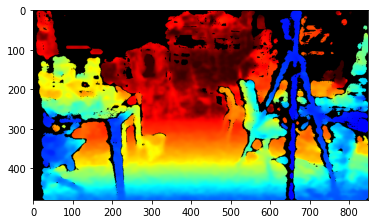

In [5]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data()) 
# for colorizer depth_frame (distances) or color_frame can be used
print(colorized_depth.shape)
plt.imshow(colorized_depth)

## Point cloud 
save, read and visualize with Open3D

In [6]:
import open3d as o3d

In [7]:
pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
pointcloud.export_to_ply("1.ply", color_frame);

In [14]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("1.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

Load a ply point cloud, print it, and render it
geometry::PointCloud with 298689 points.
[[-3.42595315  1.9505676  -3.53500009]
 [-3.41762185  1.9505676  -3.53500009]
 [-3.42665029  1.96049976 -3.55300021]
 ...
 [ 1.34025073 -0.79123718 -1.37100005]
 [ 1.34642172 -0.79296857 -1.37400007]
 [ 1.35260689 -0.79469997 -1.37700009]]


In [13]:
!python --version

Python 3.7.5


## Read 265 BAG file for poses

In [10]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file("data/265.bag")
cfg.enable_stream(rs.stream.pose)
pipe = rs.pipeline()
profile = pipe.start(cfg)

for _ in range(10):
    frames = pipe.wait_for_frames()
    pose = frames.get_pose_frame()
    if pose:
        data = pose.get_pose_data()
#         print(data.)
        print(data.translation)
        # https://intelrealsense.github.io/librealsense/python_docs/_generated/pyrealsense2.pose.html
        # TODO: save pose with timestamp

pipe.stop()

x: 0, y: 0, z: 0
x: 0, y: 0, z: 0
x: 0, y: 0, z: 0
x: 3.58329e-05, y: 2.26142e-05, z: -6.67958e-06
x: 3.4845e-05, y: 4.31442e-05, z: -1.22714e-06
x: 4.07008e-05, y: 6.05897e-05, z: -4.42286e-07
x: 4.62506e-05, y: 8.1945e-05, z: 1.00826e-06
x: 4.66408e-05, y: 0.000105489, z: -1.00991e-06
x: 4.73274e-05, y: 0.000132516, z: -2.22988e-06
x: 4.62808e-05, y: 0.000162531, z: -3.95759e-06


In [ ]:
!python --version

Python 3.7.5
